In [66]:
import pandas as pd

data = pd.read_csv('LASSO-data-set.csv')

# separate independent and dependent variables
y = data['score']
x = data.drop('score',axis=1)

In [69]:
x

,strength,dexterity,constitution,wisdom,intelligence,charisma,weight,height,modifier1,modifier2,modifier3,modifier4,modifier5,modifier6,modifier7,modifier8
0,156,181,54,61,159,60,170,58,56,60,56,60,6,4,4,4
1,148,137,89,147,159,79,166,84,47,44,53,49,11,10,5,8
2,164,144,79,143,164,84,175,80,51,56,53,56,7,13,12,8
3,176,53,84,178,198,85,180,88,37,38,40,36,5,5,0,5
4,164,86,86,75,185,93,180,89,45,47,46,48,-1,2,-1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,147,136,71,183,178,74,164,73,49,54,49,53,13,15,9,10
996,180,155,67,162,163,67,173,62,27,22,28,23,5,2,9,7
997,191,119,68,193,192,65,173,67,42,33,36,38,9,10,8,5
998,160,167,70,92,162,69,175,72,58,64,64,63,1,-1,-1,1


# Split training and test dataset

In [6]:
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.25,train_size=0.75,random_state=0)

# ML using Linear Regression

In [8]:
from sklearn import linear_model

#linear regression
reg = sklearn.linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_predicted = reg.predict(X_test)

### Plot

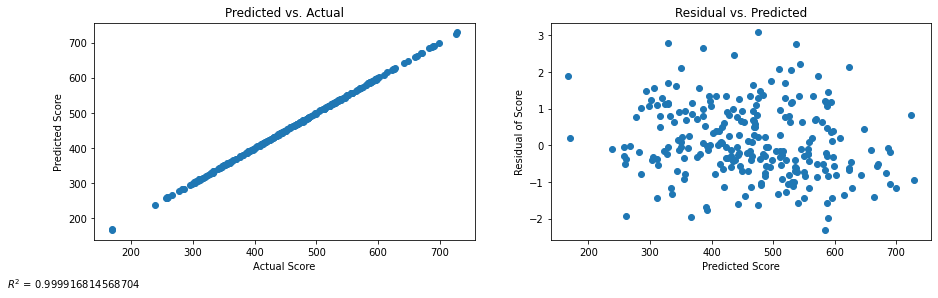

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2,figsize=(15,4))
ax[0].scatter(x=y_test,y=y_predicted)
ax[0].set_title('Predicted vs. Actual')
ax[0].set_xlabel('Actual Score')
ax[0].set_ylabel('Predicted Score')
ax[0].text(0,0,f'$R^2$ = {reg.score(X_test,y_test)}') # print out R^2 values

#plot residual
residual = list(map(lambda x,y: x-y,y_test,y_predicted))
ax[1].scatter(x=y_predicted,y=residual)
ax[1].set_title('Residual vs. Predicted')
ax[1].set_xlabel('Predicted Score')
ax[1].set_ylabel('Residual of Score')

plt.show()

### output equation

In [77]:
eq = []
count = 0
for i in range(len(reg.coef_)):   
    if reg.coef_[i] != 0:
        eq.append(f'({reg.coef_[i]} * {data.columns[i]})')
        
print(f'y = {reg.intercept_} + {" + ".join(eq)}')

y = -69.42199849114922 + (-0.004633604660787425 * strength) + (-0.0012989146247277539 * dexterity) + (0.0063068663253391475 * constitution) + (7.444041052084849e-05 * wisdom) + (0.0001665086595636911 * intelligence) + (0.00017183156493118246 * charisma) + (4.007954023146736 * weight) + (-5.011237571447863 * height) + (-0.012349690809661008 * modifier1) + (-0.0019706370923074368 * modifier2) + (0.00961775544117141 * modifier3) + (6.008969185355354 * modifier4) + (0.009343548558156639 * modifier5) + (-0.006322941009431751 * modifier6) + (0.02380408658054399 * modifier7) + (-7.0077114752117655 * modifier8)


# ML using LASSO

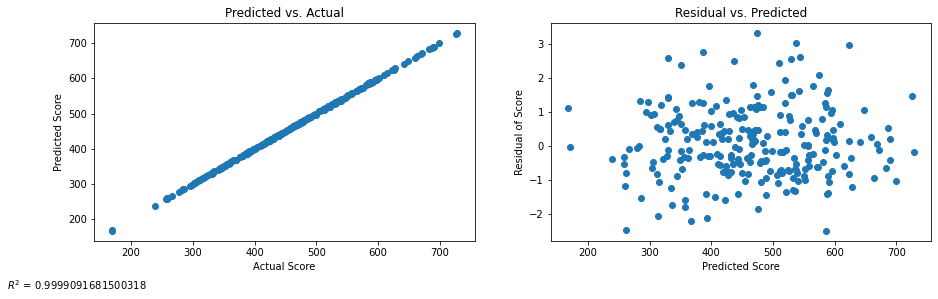

In [47]:
lasso = sklearn.linear_model.LassoCV(cv=5,random_state=0)
lasso.fit(X_train,y_train)
y_lasso_predicted = lasso.predict(X_test)

#plotting
fig2, ax2 = plt.subplots(ncols=2,figsize=(15,4))
ax2[0].scatter(x=y_test,y=y_lasso_predicted)
ax2[0].set_title('Predicted vs. Actual')
ax2[0].set_xlabel('Actual Score')
ax2[0].set_ylabel('Predicted Score')
ax2[0].text(0,0,f'$R^2$ = {lasso.score(X_test,y_test)}') # print out R^2 values

#plot residual
residual = list(map(lambda x,y: x-y,y_test,y_lasso_predicted))
ax2[1].scatter(x=y_lasso_predicted,y=residual)
ax2[1].set_title('Residual vs. Predicted')
ax2[1].set_xlabel('Predicted Score')
ax2[1].set_ylabel('Residual of Score')

plt.show()

### output equation

In [76]:
eq = []
count = 0
for i in range(len(lasso.coef_)):   
    if lasso.coef_[i] != 0:
        eq.append(f'({lasso.coef_[i]} * {data.columns[i]})')
        
print(f'y = {lasso.intercept_} + {" + ".join(eq)}')
print(f'\nalpha: {lasso.alpha_}')

y = -66.22924695707854 + (-0.0006721759765476092 * dexterity) + (-0.005375135067366434 * charisma) + (3.9795950474309683 * weight) + (-4.992722064393375 * height) + (0.019874646969769025 * modifier3) + (5.977641964349887 * modifier4) + (-0.006061428168212675 * modifier6) + (-6.868311570279579 * modifier8)

alpha: 1.0749236577654113


# Differences between two models

Lasso uses only 8 variables whereas LR uses 16.
LR has a slightly higher R^2 value, very slightly.
The Y-intercept for both methods are different.